<table align="left">
  <td>
    <a href="https://tinyurl.com/2zzbxxep" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes Neuronales Convolucionales(CNN) - Tensorflow

Las redes neuronales convolucionales son una variación de las redes neuronales artificiales que se han vuelto muy populares en el campo del aprendizaje profundo. Las redes neuronales convolucionales son muy eficientes para analizar imágenes y videos.

Visión computacional es una rama de la inteligencia artificial que se ocupa de hacer que las computadoras puedan entender imágenes y videos.

¿Qué es un problema de visión por computadora?: Problemos en los cuales se busca que una computadora pueda entender imágenes y videos.

- Clasificación de imágenes: Clasificar imágenes en diferentes categorías.
- Detección de objetos: Identificar objetos en una imagen.
- Segmentación de imágenes: Identificar qué parte de la imagen pertenece a qué objeto.
- Reconocimiento facial: Identificar quién está en una imagen.
- Reconocimiento de escenas: Identificar qué tipo de escena se está viendo en una imagen.
- Reconocimiento de texto: Identificar qué texto está escrito en una imagen.
- Reconocimiento de voz: Identificar qué se está diciendo en un video.



Temas a cubrir en este notebook:

* Obtener dataset para trabajar con ellos
* Arquitectura de una CNN
* Un ejemplo end-to-end de una CNN
* Pasos para el modelamiento de un problema de clasificación binaria con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado
* Pasos para el modelamiento de un problema de clasificación multiclase con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado

![cnn](https://i2.wp.com/datasmarts.net/es/wp-content/uploads/2018/11/1_N4h1SgwbWNmtrRhszM9EJg.png?fit=1558%2C424&ssl=1)

<a href="https://ibb.co/L0jfm19"><img src="https://i.ibb.co/QJSGLMY/cnn.png" alt="cnn" border="0"></a>

[:key: CNN Referencia: What is a Convolutional Neural Network?](https://poloclub.github.io/cnn-explainer/)

## Obtener dataset

Las imagenes que se utilizaran en el siguiente ejemplo hacen parte del dataset food101. Este dataset contiene 101,000 imágenes de 101 clases de comida diferentes. El dataset se encuentra dividido en 3 carpetas, una para entrenamiento, una para pruebas y otra para validación. Cada carpeta contiene 101 subcarpetas, una para cada clase de comida.

[:key: Dataset Referencia: Food101](https://www.tensorflow.org/datasets/catalog/food101)

Se utilizará el dataset pizza_steak, este dataset contiene imágenes de pizza y de carne asada. El dataset contiene 750 imágenes de pizza y 750 imágenes de carne asada. El dataset se encuentra dividido en 2 carpetas, una para entrenamiento y otra para pruebas. Cada carpeta contiene 2 subcarpetas, una para pizza y otra para carne asada.


In [2]:
import os

In [3]:
import zipfile
import wget # pip install wget - para windows
# otra opción instalar wget en windows (https://www.jcchouinard.com/wget/)

if(os.path.exists('pizza_steak')):
    print('Files exists')
else:
    # en caso de utilizar colab la descarga se puede realizar con el siguiente comando
    #!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

    # Download zip file of pizza_steak images using wget library in windows
    url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
    filename = wget.download(url)

    # Unzip the downloaded file
    zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
    zip_ref.extractall()
    zip_ref.close()

Files exists


## Inspeccionar el dataset

El objetivo de este paso es entender la estructura del dataset y ver si es posible utilizarlo para nuestro problema. Antes de empezar a trabajar con el dataset, es importante saber cuántas imágenes hay en el dataset, cuántas de cada clase, cuántas imágenes hay en el conjunto de entrenamiento y cuántas hay en el conjunto de pruebas.

In [4]:
!dir pizza_steak # para windows
#!ls pizza_steak # para colaboratory o linux

 El volumen de la unidad H es Google Drive
 El n�mero de serie del volumen es: 1983-1116

 Directorio de h:\Mi unidad\Github\TensorFlow-Course\pizza_steak

24/09/2020  08:56 p. m.    <DIR>          .
24/12/2022  02:05 p. m.    <DIR>          ..
19/08/2020  11:21 p. m.    <DIR>          test
19/08/2020  07:31 p. m.    <DIR>          train
               0 archivos              0 bytes

 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course



No se encuentra el archivo


In [5]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.


### Nombre de las clases - 1
Para visualizar las imagenes, primero obtenemos los nombres de las clases de las imagenes.

In [6]:
# Obtener el nombre de las clases
# Este codigo crea una lista de clases utilizando el nombre de las carpetas
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Visualizar las imagenes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)


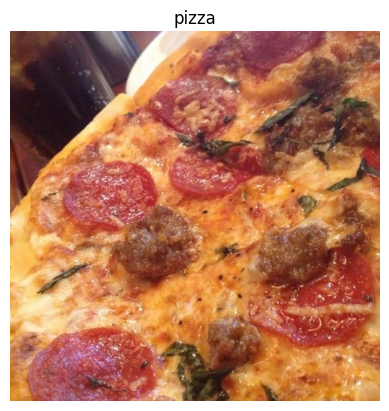

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [9]:
# Convertir una imagen en un tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[113,  70,  51],
        [116,  73,  54],
        [114,  72,  50],
        ...,
        [198, 122,  96],
        [184, 108,  84],
        [180, 106,  81]],

       [[113,  70,  51],
        [117,  74,  55],
        [115,  73,  51],
        ...,
        [187, 111,  85],
        [180, 106,  81],
        [195, 121,  96]],

       [[111,  68,  49],
        [116,  73,  54],
        [116,  73,  54],
        ...,
        [171,  96,  67],
        [176, 102,  75],
        [186, 112,  85]],

       ...,

       [[215, 135,  38],
        [217, 137,  42],
        [220, 139,  47],
        ...,
        [200, 135,  55],
        [199, 134,  54],
        [197, 134,  54]],

       [[216, 136,  41],
        [218, 138,  43],
        [222, 141,  49],
        ...,
        [200, 135,  53],
        [198, 133,  51],
        [197, 132,  50]],

       [[217, 137,  42],
        [219, 139,  44],
        [224, 143,  52],
        ...,
        [203, 137,  5

In [10]:
# Ver la dimension de la imagen
img.shape # devuelve width, height, color channels

(512, 512, 3)

## Ejemplo end-to-end de una CNN

En este ejemplo se va a construir una CNN desde cero para clasificar imágenes de pizza y de carne asada. El objetivo es construir una CNN que pueda clasificar imágenes de pizza y de carne asada con una precisión mayor al 95%.

- Cargar las imágenes
- Preprocesar las imágenes
- Construir un modelo de CNN para encontrar patrones en las imágenes
- Compilar el modelo de CNN
- Ajustar el modelo de CNN
- Evaluar el modelo de CNN
- Predecir con el modelo de CNN


### Normalizar las imagenes

:key: Normalizar las imagenes es un paso importante para que el modelo pueda aprender mejor. Normalizar las imagenes significa convertir las imagenes de un rango de valores de 0 a 255 a un rango de valores de 0 a 1. Esto se hace dividiendo cada valor de pixel por 255.


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocesar las imagenes - normalizarlas entre 0 y 1
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Importar las imagenes desde el directorio y convertirlas en lotes
train_path = "pizza_steak/train/"
test_path = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory = train_path, 
                                                    batch_size = 32,
                                                    target_size = (224, 224),
                                                    class_mode = "binary",
                                                    seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_path,
                                                batch_size = 32,
                                                target_size = (224, 224),
                                                class_mode = "binary",
                                                seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
len(train_data) # 47 lotes de 32 imagenes cada uno
1500/32 # 47 lotes de 32 imagenes cada uno

46.875

In [13]:
len(valid_data) # 16 lotes de 32 imagenes cada uno
500/32 # 16 lotes de 32 imagenes cada uno

15.625

In [14]:
# Construir un modelo CNN (Tiny VGG the CNN explainer website https://poloclub.github.io/cnn-explainer/)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno 
                        verbose=1)


Epoch 1/5
47/47 [==============================] - 28s 460ms/step - loss: 0.5915 - accuracy: 0.6713 - val_loss: 0.4390 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 18s 392ms/step - loss: 0.4464 - accuracy: 0.7953 - val_loss: 0.3358 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 21s 434ms/step - loss: 0.4070 - accuracy: 0.8220 - val_loss: 0.3258 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 18s 380ms/step - loss: 0.3771 - accuracy: 0.8353 - val_loss: 0.3098 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 18s 376ms/step - loss: 0.3312 - accuracy: 0.8687 - val_loss: 0.3058 - val_accuracy: 0.8760


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

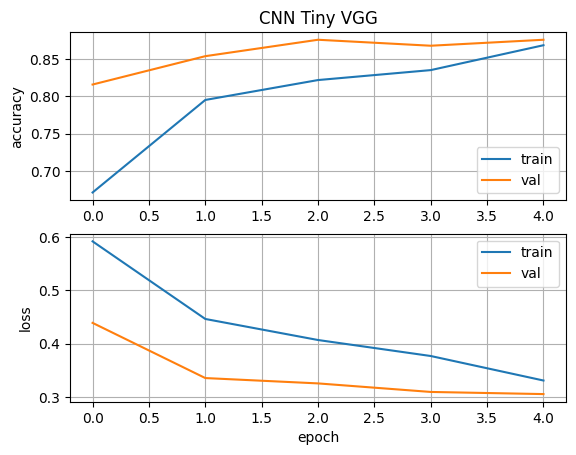

In [16]:
plt.subplot(211)
plt.title('CNN Tiny VGG')
plt.plot(history_1.history['accuracy'])  
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()

:key: Despues de 5 epochs, nuestro modelo obtuvo una exactitud de 87.8% en el conjunto de entrenamiento y una precisión de 86% en el conjunto de pruebas. Esto significa que nuestro modelo aprendió a clasificar correctamente las imágenes de pizza y de carne asada con una precisión de 86%.

Sin embargo, este modelo solo resuelve un problema de clasificación binaria. Los resultados muestran que el modelo aprendió algo. Sin embargo, no es suficiente para resolver el problema de clasificación multiclase que se tiene en el dataset food101.

## Red neuronal Densa para clasificación de imágenes

El siguiente modelo tiene como objetivo comparar el rendimiento de una red neuronal densa con el de una CNN para el problema de clasificación binario de pizza vs carne asada. El modelo de red neuronal densa tiene 3 capas ocultas, cada una con 100 neuronas.

In [17]:
# set the seed
tf.random.set_seed(42)

# Crear un modelo

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno
                        verbose=1)


Epoch 1/5
47/47 [==============================] - 19s 389ms/step - loss: 3.4496 - accuracy: 0.6400 - val_loss: 2.1267 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 18s 388ms/step - loss: 0.9025 - accuracy: 0.7120 - val_loss: 0.4698 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 18s 389ms/step - loss: 0.8360 - accuracy: 0.7133 - val_loss: 0.5746 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 18s 387ms/step - loss: 0.6679 - accuracy: 0.7533 - val_loss: 0.4386 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 18s 381ms/step - loss: 0.4532 - accuracy: 0.7993 - val_loss: 0.5984 - val_accuracy: 0.7040


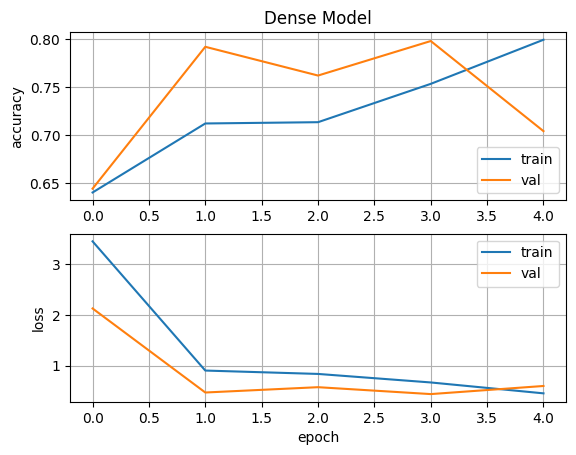

In [18]:
plt.subplot(211)
plt.title('Dense Model')
plt.plot(history_2.history['accuracy'])  
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_2.history['loss'])  
plt.plot(history_2.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Clasificación binaria con CNN: Pasos

1. Conocer los datos
2. Preprocesamiento de los datos (normalización)
3. Construcción del modelo de CNN (Iniciar con un modelo base - estructura simple)
4. Entrenamiento del modelo
5. Evaluación del modelo
6. Mejorar el modelo (Tratar de vencer el modelo base)
7. Repetir hasta alcanzar el objetivo deseado (Experimentar, experimentar, experimentar)


### 1. Conocer los datos

En este paso se debe conocer el dataset, saber cuántas imágenes hay en el dataset, cuántas de cada clase, cuántas imágenes hay en el conjunto de entrenamiento y cuántas hay en el conjunto de pruebas.

Image shape: (512, 512, 3)
Image shape: (288, 512, 3)


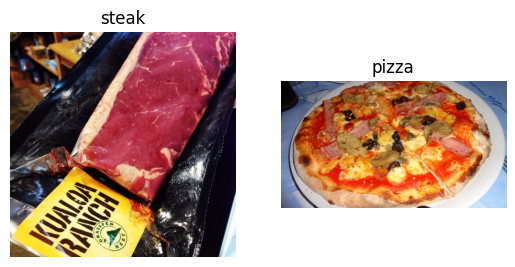

In [20]:
# Visualizar los datos
#plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocesamiento de los datos



In [21]:
# Definir el directorio del dataset

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


El siguiente paso es agrupar las imágenes en lotes - **batches**. El tamaño del lote es el número de imágenes que se procesan en cada paso de entrenamiento.

Un **Batch** es un subconjunto de imagenes. De tal forma que, durante el entrenamiento no se observan todas las imagenes al mismo tiempo, sino que se observan en grupos de imagenes.

Se realiza de esta forma por las siguientes razones:

1. 10,000 imágenes o mas pueden ser muy pesadas para la memoria RAM de la computadora.
2. Tratar de aprender los patrones de 10,000 imágenes a la vez puede ser muy difícil para el modelo.
3. Es común utilizar lotes de **32**, 64 o 128 imágenes.

> :key: **ImageDataGenerator**: Genera lotes de imágenes de forma automática incluyendo normalización y aumento de datos.

> :key: **flow_from_directory**: Crea un generador de lotes de imágenes a partir de las imágenes en un directorio. 



In [22]:
# Crear train y test data generators y rescalar las imagenes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Cargar las imagenes del directorio y aplicar la normalización, 
# aumentación de datos y conversión en lotes. 

train_data = train_datagen.flow_from_directory(directory=train_dir, # Directorio del dataset
                                                target_size=(224, 224), # Tamaño de las imagenes
                                                batch_size=32, # Cantidad de imagenes por lote
                                                class_mode="binary", # Clases binarias
                                                seed=42) # Semilla para reproducibilidad

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Obtener un ejemplo de un lote de imagenes y sus etiquetas
images, labels = train_data.next() # next() devuelve un lote de imagenes y sus etiquetas

len(images), len(labels)

(32, 32)

In [25]:
# Cuantos lotes de imagenes hay en el dataset de entrenamiento
len(train_data)

47

In [26]:
1500/32 # 47 lotes de 32 imagenes cada uno

46.875

In [27]:
# Observar las dos primeras imagenes del lote
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

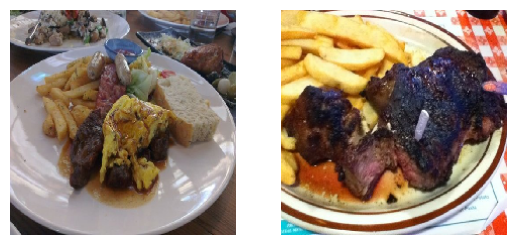

In [28]:
# Visualizar las dos primeras imagenes del lote
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(images[1])
plt.axis("Off");

### 3. Crear un modelo de CNN (Iniciar con un modelo base - estructura simple)

Un modelo base es un modelo relativamente simple o un modelo que ha sido probado y funciona bien en un problema similar al que se está tratando de resolver.

> :key: **Nota**: En deep learning, hay un gran número de arquitecturas que se pueden probar. Por lo tanto, una de las mejores formas para empezar, consiste en probar un modelo base, observar si funciona y a partir de ahí, ir mejorando el modelo agregando complejidad o haciendo cambios en la arquitectura. (Ej. Investigar cual modelo actual está presentando un mejor rendimiento para el problema en cuestión - [Papers with Code](https://paperswithcode.com/sota))

:book: **Componentes de una capa convolucional Conv2D**:

- "**2D**" significa que nuestras entradas son bidimensionales (altura y ancho), aunque tienen 3 canales de color, las convoluciones se ejecutan en cada canal individualmente.
- **filters** - estos son el número de "extractores de características" que se moverán sobre nuestras imágenes.
- **kernel_size** - el tamaño de nuestros filtros, por ejemplo, un kernel_size de (3, 3) (o solo 3) significará que cada filtro tendrá el tamaño 3x3, lo que significa que mirará un espacio de 3x3 píxeles cada vez. Cuanto más pequeño sea el kernel, más características finas extraerá.
- **stride** - el número de píxeles que se moverá un filtro a medida que cubra la imagen. Un stride de 1 significa que el filtro se mueve a través de cada píxel 1 por 1. Un stride de 2 significa que se mueve 2 píxeles a la vez.
- **padding** - esto puede ser 'same' o 'valid', 'same' agrega ceros al exterior de la imagen para que el resultado de la capa convolucional sea el mismo que la entrada, donde 'valid' (predeterminado) corta los píxeles excesivos donde el filtro no encaja (por ejemplo, 224 píxeles de ancho divididos por un tamaño de kernel de 3 (224/3 = 74.6) significa que se cortará un píxel del final). Si la imagen presenta información importante en los bordes, es posible que desee usar 'same' para evitar perderla.

**Qué es una Característica?** - Una característica es cualquier parte de una imagen que puede ser utilizada para distinguir entre dos clases. Por ejemplo, en nuestro caso, una característica podría ser la forma circular de una pizza. O los bordes ásperos en el exterior de una carne hamburguesa. Es importante tener en cuenta que estas características no están definidas por nosotros, en su lugar, el modelo las aprende a medida que aplica diferentes filtros a través de la imagen.

:book: **Componentes de una capa de agrupamiento MaxPooling2D**: Esta capa se utiliza para reducir la dimensionalidad de la imagen. La capa de agrupamiento MaxPooling2D toma el valor máximo de cada grupo de píxeles. Por ejemplo, si el tamaño del kernel es 2x2, la capa de agrupamiento MaxPooling2D tomará el valor máximo de cada grupo de 4 píxeles y lo reemplazará por un solo píxel. Esto reduce la cantidad de píxeles en la imagen, lo que significa que la imagen es más pequeña y más fácil de procesar.

:book: **Componentes de una capa de aplanamiento Flatten**: Esta capa convierte la imagen en un vector unidimensional. La capa de aplanamiento es necesaria porque las capas densas solo aceptan vectores unidimensionales como entrada.


> :eye: **Nota**: En el siguiente ejemplo (**model_3**) se utilizará un modelo base, en el cual no se utiliza la capa de pooling, con el fin de observar el efecto de esta capa en el rendimiento del modelo.



In [29]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [30]:
# crear un modelo base (baseline model) - sin capas de pooling
model_3 = Sequential([
    Conv2D(filters=10,          # Cantidad de filtros
            kernel_size=(3,3),  # Tamaño del filtro
            strides=(1,1),      # Tamaño del paso que se da al mover el filtro
            padding="valid",    # "same" para mantener el tamaño de la imagen, "valid" para comprimir la imagen
            activation="relu",
            input_shape=(224, 224, 3)), 
    Conv2D(10,3,activation="relu"),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [31]:
# Compilar el modelo
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
model_3.summary()
# debido a que se utiliza padding="valid" la imagen se va comprimiendo en las diferentes capas del modelo. Entrada 224x224, salida 53x53

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 216, 216, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 466560)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 466561    
Total params: 469,571
Trainable params: 469,571
Non-trainable params: 0
________________________________________________

### 4. Entrenar el modelo

Despues de compilar el modelo, es hora de entrenarlo. Encontraremos dos nuevos parámetros aquí:

- steps_per_epoch - este es el número de lotes que un modelo pasará por época, en nuestro caso, queremos que nuestro modelo pase por todos los lotes, por lo que es igual a la longitud de train_data (1500 imágenes en lotes de 32 = 1500/32 = ~47 pasos)

- validation_steps - lo mismo que arriba, excepto para el parámetro validation_data (500 imágenes de prueba en lotes de 32 = 500/32 = ~16 pasos)

In [33]:
# Verificar el tamaño del generador de datos de entrenamiento y testeo
len(train_data), len(valid_data)

(47, 16)

In [34]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno
                        verbose=1)

Epoch 1/5
47/47 [==============================] - 20s 398ms/step - loss: 0.9879 - accuracy: 0.5760 - val_loss: 0.5534 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 18s 380ms/step - loss: 0.5209 - accuracy: 0.7460 - val_loss: 0.4128 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 18s 375ms/step - loss: 0.4643 - accuracy: 0.7893 - val_loss: 0.4780 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.4141 - accuracy: 0.8227 - val_loss: 0.3980 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 20s 412ms/step - loss: 0.3102 - accuracy: 0.8787 - val_loss: 0.3926 - val_accuracy: 0.8440


### 5. Evaluar el modelo

Después de entrenar el modelo, es hora de evaluarlo.


### 5.1 Graficar las curas de entrenamiento y validación

In [35]:
def plot_training_curves(history):
    # Plot training & validation accuracy values
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Training Curves')
    plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.grid(True)
    # Plot training & validation loss values
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.grid(True)
    plt.show()

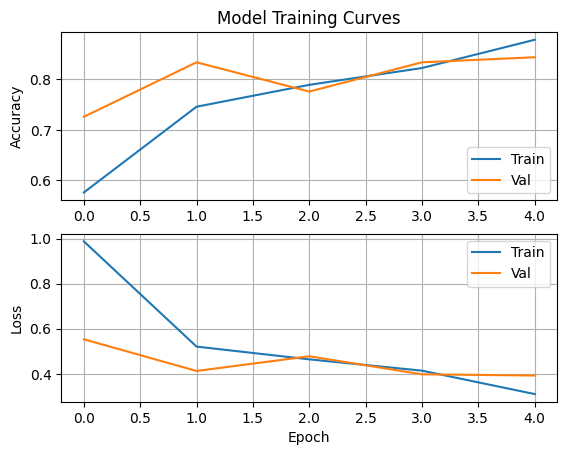

In [36]:
plot_training_curves(history_3)

> :eye: **Nota**: El analisis de las curvas de entrenamiento y validación, nos permite observar si el modelo presenta un sobreajuste o un subajuste.
 
> - En el caso de un **sobreajuste**, el modelo presenta un rendimiento excelente en el conjunto de entrenamiento, pero un rendimiento pobre en el conjunto de validación. **Esto se evidencia en la divergencia entre las curvas de entrenamiento y validación en la metrica de Accuracy.** O en las presencia de tendencias diferentes en las curvas de entrenamiento y validación en la metrica de Loss.

> - En el caso de un **subajuste**, el modelo presenta un rendimiento pobre en el conjunto de entrenamiento y un rendimiento pobre en el conjunto de validación.

### 6. Ajustar los parametros del modelo

Entrenar un modelo de machine learning es un proceso iterativo que se puede dividir en los siguientes pasos:

1. Crear un modelo Base
2. Vencer el modelo Base sobreajustando un modelo mayor. 
3. Reducir el sobreajuste del modelo mayor.

**Formas de inducir sobreajuste:**

* Aumentar el número de capas convolucionales
* Aumentar el número de filtros en cada capa convolucional
* Agregar más capas densas en la parte superior del modelo

**Formas de reducir el sobreajuste:**

* Agregar aumentación de datos
* Agregar capas de regularización (como Dropout, **MaxPooling2D**, etc.)
* Agregar mas datos de entrenamiento
* ...

> :eye: **Nota**: En el siguiente ejemplo (**model_4**) se utilizará un modelo base, en el cual se utiliza la capa de pooling para reducir el sobreajuste.

### 6.1 Reducir el sobreajuste con MaxPooling2D


In [37]:
# Crear un nuevo modelo adicionando capas de regularización
model_4 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # Capa de regularización
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [38]:
# Compilar el modelo
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In [40]:
# Entrenar el modelo

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno
                        verbose=1)

Epoch 1/5
47/47 [==============================] - 22s 445ms/step - loss: 0.6844 - accuracy: 0.5587 - val_loss: 0.6012 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 19s 399ms/step - loss: 0.5025 - accuracy: 0.7593 - val_loss: 0.3798 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 19s 392ms/step - loss: 0.4163 - accuracy: 0.8147 - val_loss: 0.3403 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 18s 389ms/step - loss: 0.3964 - accuracy: 0.8247 - val_loss: 0.3290 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 19s 396ms/step - loss: 0.3744 - accuracy: 0.8327 - val_loss: 0.3182 - val_accuracy: 0.8780


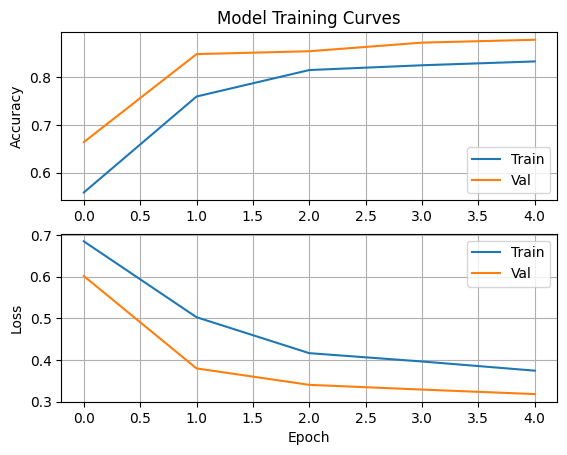

In [41]:
plot_training_curves(history_4)

### 6.2 Reducir el sobreajuste con Data Augmentation

**Data Augmentation**: es una técnica que permite aumentar el número de ejemplos de entrenamiento, creando nuevas imágenes a partir de las existentes. Esto se logra aplicando transformaciones aleatorias a las imágenes, como rotaciones, traslaciones, zoom, etc. Esto permite que el modelo vea más ejemplos de entrenamiento, lo que significa que el modelo generaliza mejor.

In [42]:
# Crear ImagenDataGenerator para generar imagenes aumentadas
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # Rotar las imagenes en un rango de 20 grados
                                            shear_range=0.2, # Inclinación de las imagenes
                                            zoom_range=0.2, # Zoom de las imagenes
                                            width_shift_range=0.2, # Desplazamiento horizontal de las imagenes
                                            height_shift_range=0.2, # Desplazamiento vertical de las imagenes
                                            horizontal_flip=True, # Voltear las imagenes horizontalmente
                                            fill_mode="nearest") # Modo de rellenar los pixeles vacios

# Crear un generador de imagenes de entrenamiento sin imagenes aumentadas
train_datagen = ImageDataGenerator(rescale=1/255.)

# Crear un generador de imagenes de teste sin imagenes aumentadas
test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
# Importar datos y aplicar data augmentation para generar batches de imagenes
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False, # Solo para fines de visualización
                                                                    seed=42)
# Crear datos no aumentados en batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False, # Solo para fines de visualización
                                                seed=42)
# Crear datos de test no aumentados en batches
IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            seed=42)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> :key: **Nota**: La data augmentation se realiza en el conjunto de entrenamiento, pero no en el conjunto de validación. 

> :eye: **Nota**: La aumentación de datos se realiza a medida que el modelo se entrena, por lo que no se almacena en la memoria. Esto significa que no se puede utilizar la misma imagen de entrada varias veces, ya que cada vez que se aplica una transformación aleatoria, la imagen de entrada cambia.

In [44]:
# Obtener una muestra de imagenes aumentadas
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 22


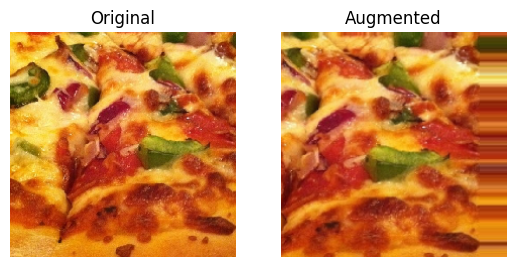

In [45]:
# Visualizar las imagenes originales y las imagenes aumentadas

import random
random_number = random.randint(0,31)
print(f"Showing image number: {random_number}")
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented")
plt.axis("off");


> :eye: **Nota**: Ajustar el parametro shuffle a True, para el entrenamiento del modelo. Esto permite que el modelo vea los datos de entrenamiento en un orden aleatorio, lo que significa que el modelo no puede aprender el orden de los datos de entrenamiento.

In [46]:
# Importar datos y aplicar data augmentation para generar batches de imagenes
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True, # Solo para fines de visualización
                                                                    seed=42)
# Crear datos no aumentados en batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=True, # Solo para fines de visualización
                                                seed=42)
# Crear datos de test no aumentados en batches
IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            seed=42)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [47]:
# Crear un nuevo modelo
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # Capa de regularización
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compilar el modelo
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        verbose=1)

Epoch 1/5
47/47 [==============================] - 33s 691ms/step - loss: 0.6411 - accuracy: 0.6233 - val_loss: 0.5462 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 31s 656ms/step - loss: 0.5160 - accuracy: 0.7467 - val_loss: 0.3633 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 31s 653ms/step - loss: 0.4875 - accuracy: 0.7733 - val_loss: 0.4912 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 32s 672ms/step - loss: 0.4903 - accuracy: 0.7613 - val_loss: 0.3470 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 31s 654ms/step - loss: 0.4659 - accuracy: 0.7967 - val_loss: 0.3498 - val_accuracy: 0.8580


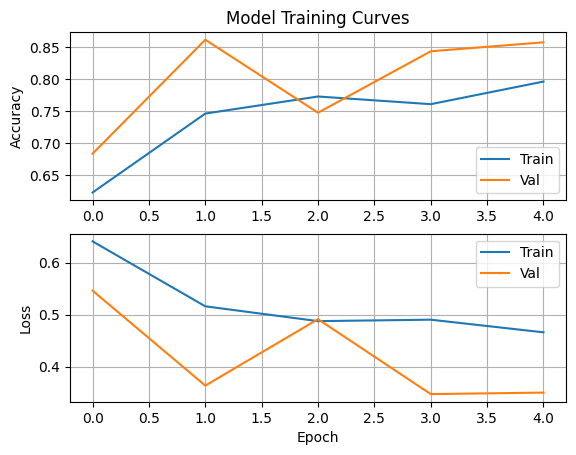

In [48]:
plot_training_curves(history_5)

> :eye: El resultado muestra que el modelo tiene un rendimiento mucho mejor en el conjunto de validación que en el conjunto de entrenamiento, lo que significa que el modelo no está sobreajustado. Adicionalmente se observa que el modelo presenta una tendencia decreciente en las curvas de entrenamiento y validación en la metrica de Loss, lo que indica que el modelo no presenta un subajuste.

### 7. Repetir el proceso de ajuste de parametros

Dado que ya fue superado el rendimiento del modelo base, es necesario probar algunas modificaciones en el modelo para ver si se puede mejorar el rendimiento.

- Aumentar el número de capas convolucionales (`Conv2D`, `MaxPooling2D`)
- Aumentar el número de filtros en cada capa convolucional (`Conv2D`)
- Agregar más capas densas en la parte superior del modelo (`Dense`)
- Entrenar el modelo por más épocas
- Encontrar la tasa de aprendizaje ideal.
- Obtener mas datos de entrenamiento
- Utilizar **Transfer Learning**, para aprovechar el conocimiento de un modelo previamente entrenado y adaptarlo a nuestro problema.
- ...

### 7.1 Baseline Model + Data Augmentation

Para este experimento se utilizara el modelo Base tomado de la página [CNN Explainer](https://poloclub.github.io/cnn-explainer/):

**Modelo Base**: 2 capas convolucionales, 1 capa de pooling, 2 capas convolucionales, 1 capa de pooling, 1 capa densa.

In [49]:
# Crear un nuevo modelo
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224, 224, 3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compilar el modelo
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        verbose=1)

Epoch 1/10
47/47 [==============================] - 32s 676ms/step - loss: 0.6577 - accuracy: 0.6247 - val_loss: 0.5278 - val_accuracy: 0.7340
Epoch 2/10
47/47 [==============================] - 34s 720ms/step - loss: 0.5997 - accuracy: 0.6767 - val_loss: 0.4818 - val_accuracy: 0.7880
Epoch 3/10
47/47 [==============================] - 32s 674ms/step - loss: 0.5515 - accuracy: 0.7327 - val_loss: 0.4590 - val_accuracy: 0.7840
Epoch 4/10
47/47 [==============================] - 32s 667ms/step - loss: 0.5356 - accuracy: 0.7467 - val_loss: 0.4379 - val_accuracy: 0.8060
Epoch 5/10
47/47 [==============================] - 32s 670ms/step - loss: 0.5409 - accuracy: 0.7447 - val_loss: 0.4369 - val_accuracy: 0.7960
Epoch 6/10
47/47 [==============================] - 32s 673ms/step - loss: 0.5203 - accuracy: 0.7527 - val_loss: 0.3961 - val_accuracy: 0.8280
Epoch 7/10
47/47 [==============================] - 33s 707ms/step - loss: 0.4925 - accuracy: 0.7633 - val_loss: 0.4818 - val_accuracy: 0.7460

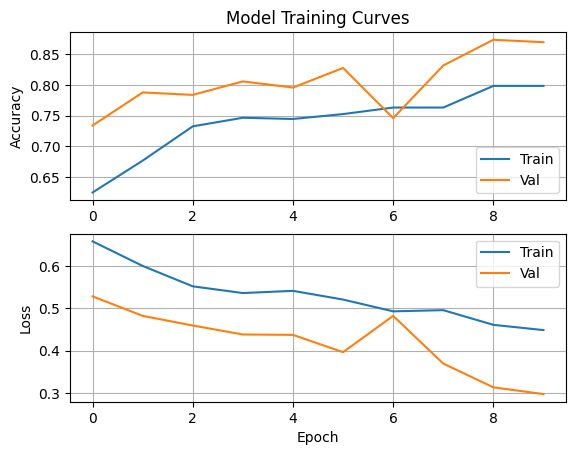

In [50]:
plot_training_curves(history_6)

**Resultados** del modelo **Tiny VGG**

> :eye: **Nota**: En la grafica de curvas de entrenamiento se observa en en ciertos puntos durante el entrenamiento el modelo encontró mejores soluciones, pero no pudo mantenerlas. Podria entonces utilizarle un **callback** para salvar el modelo en el punto en el que se encontró la mejor solución.

### 8. Hacer predicciones con el modelo

Una vez que se ha entrenado el modelo, es hora de hacer predicciones utilizando una imagen descargada de internet.

In [51]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


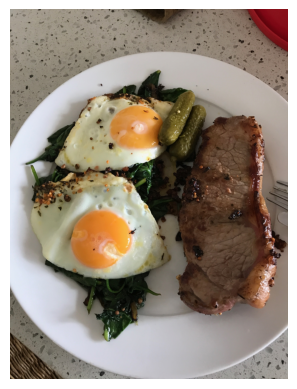

In [52]:
# Visualizar imagen de prueba
# url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
steak = mpimg.imread("images/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
steak.shape

(4032, 3024, 3)

### 8.1 Preprocesar la imagen para que sea compatible con el modelo

Para que las imágenes sean compatibles con el modelo, es necesario realizar el mismo preprocesamiento que se realizó en el conjunto de datos de entrenamiento.

1. Cargar la imagen
2. Redimensionar la imagen (224x224)
3. Convertir la imagen en un tensor
4. Normalizar la imagen
5. Agregar una dimensión extra al principio del tensor. El modelo espera imagenes que hacenb parte de un lote (batch), por lo que se agrega una dimensión extra al principio del tensor.

In [54]:
#Preprocesar la imagen para que sea compatible con el modelo
steak = tf.image.resize(steak, size=[224,224])
steak = tf.cast(steak, dtype=tf.float32)
steak = steak/255.
steak = tf.expand_dims(steak, axis=0) # Agregar una dimensión extra al principio
steak.shape

TensorShape([1, 224, 224, 3])

In [55]:
# Crear una función para preprocesar imágenes externas al dataset
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
    """
    # Leer la imagen
    img = tf.io.read_file(filename)
    # Decodificarla en un tensor
    img = tf.image.decode_image(img)
    # Cambiar el tamaño de la imagen
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Escalar la imagen (valores entre 0 y 1)
    img = img/255.
    return img

In [56]:
# Cargar y preprocesar una imagen externa
steak_prep = load_and_prep_image("images/03-steak.jpeg")
steak_prep.shape

TensorShape([224, 224, 3])

In [57]:
# Predecir la clase de la imagen
pred = model_6.predict(tf.expand_dims(steak_prep, axis=0))
pred.shape

(1, 1)

In [58]:
len(class_names)

2

Visualizar la imagen junto a la predicción del modelo.

In [59]:
# Indexar la clase predicha (0 = no steak, 1 = steak)

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [60]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with a model and plots the image with the predicted class as the title.
    """
    # Preprocesar la imagen
    img = load_and_prep_image(filename)
    # Hacer una predicción
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Obtener la clase predicha
    if len(class_names)> 2:
        pred_class = class_names[np.argmax(pred)]
    else:
        pred_class = class_names[int(tf.round(pred))]
    # Cargar la imagen
    img = mpimg.imread(filename)
    # Mostrar la imagen y agregar el título
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

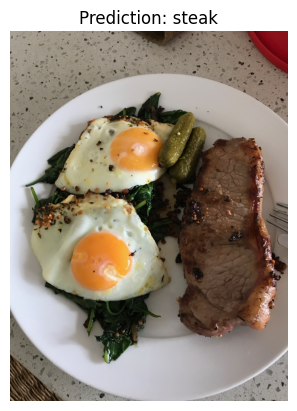

In [61]:
pred_and_plot(model_6, "images/03-steak.jpeg")

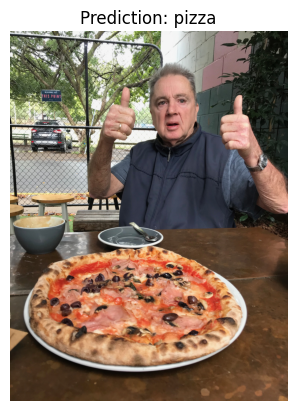

In [132]:
pred_and_plot(model_6, "images/03-pizza-dad.jpeg")